In [ ]:
import nltk
import pandas as pd
import numpy as np

data = pd.read_csv("SMSSpamCollection.tsv",sep ="\t",header = None)
# Corrected the typo in the column names
data.columns = ['labels','body_text']
data.head()

print("input data has {} rows and {} columns".format(len(data),len(data.columns)))
print(data.columns)

print("Out of {} rows, {} are spam. {} are ham".format(len(data),len(data[data['labels']=='spam']),
                                                       len(data),len(data[data['labels']=='ham'])))


input data has 5572 rows and 2 columns
Index(['labels', 'body_text'], dtype='object')
Out of 5572 rows, 747 are spam. 5572 are ham


In [ ]:
print("number of null in label: {}".format(data['labels'].isnull().sum()))
print("number of null in label: {}".format(data['body_text'].isnull().sum()))

number of null in label: 0
number of null in label: 0


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
  text_nonpunct = "".join([char for char in text if char not in string.punctuation])
  return text_nonpunct

data['body_text_clean'] = data['body_text'].apply(lambda x:remove_punct(x))
data.head()

,labels,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [ ]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))


data.head()


,labels,body_text,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [ ]:
#Remove stopwords like but and
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopwords]
  return text

data['body_text_nostop']=data['body_text_tokenized'].apply(lambda x:remove_stopwords(x))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,labels,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [ ]:
#stemming
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x:stemming(x))
data.head()

,labels,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [ ]:
#lemmatization
import nltk
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text =[wn.lemmatize(word) for word in tokenized_text]
  return text

data['body_text_limmatized']=data['body_text_nostop'].apply(lambda x:lemmatizing(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,labels,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_limmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


In [ ]:
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd


# Initialize the stop words and stemmer
stopwords = stopwords.words('english')
ps = PorterStemmer()

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

count_vect = CountVectorizer(analyzer=clean_text)
x_count = count_vect.fit_transform(data['body_text'])

print(x_count.shape)


(5572, 8109)


In [ ]:
#apply count vectorizer to a smaller sample
data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
x_count_sample = count_vect_sample.fit_transform(data_sample['body_text'])

print(x_count_sample.shape)

(20, 221)


In [ ]:
#sparse matrix
x_count_sample

<20x221 sparse matrix of type '<class 'numpy.int64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [ ]:
x_counts_df = pd.DataFrame(x_count_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

x_counts_df = pd.DataFrame(x_count.toarray(), columns=count_vect.get_feature_names_out())
x_counts_df

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(x_tfidf.shape)

(5572, 8109)


In [ ]:
#TF_IDE small sample
data_sample = data[0:20]
tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
x_tfidf_sample = tfidf_vect.fit_transform(data_sample['body_text'])
print(x_tfidf_sample.shape)

(20, 221)


In [ ]:
X_tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.198423,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.237559,0.000000,...,0.000000,0.000000,0.000000,0.188426,0.00,0.000000,0.237559,0.000000,0.000000,0.000000
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.000000,0.231645,0.000000,0.000000,0.000000,0.0000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#feature eng
data = pd.read_csv("SMSSpamCollection.tsv",sep ="\t",header = None)
data.colums = ['labels','body_text']
data.head()


,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.columns = ['labels', 'body_text']
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,labels,body_text,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

# Apply the function to create 'punct%' column
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

# Display the DataFrame with the new column
print(data.head())

  labels                                          body_text  body_len  punct%
0    ham  Go until jurong point, crazy.. Available only ...        92     9.8
1    ham                      Ok lar... Joking wif u oni...        24    25.0
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...       128     4.7
3    ham  U dun say so early hor... U c already then say...        39    15.4
4    ham  Nah I don't think he goes to usf, he lives aro...        49     4.1


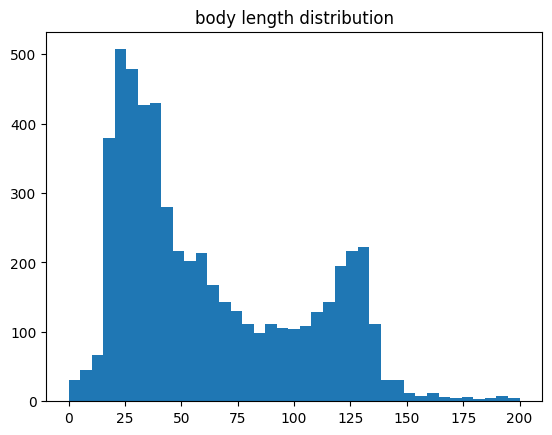

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(0,200,40)
plt.hist(data['body_len'],bins)
plt.title("body length distribution")
plt.show()

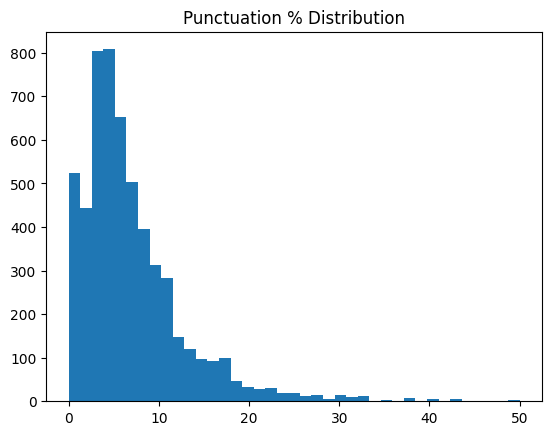

In [ ]:
bins = np.linspace(0,50,40)
plt.hist(data['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()

In [ ]:
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\w',text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])

In [ ]:
x_features = pd.concat([data['body_len'],data['punct%'],pd.DataFrame(x_tfidf.toarray())],axis = 1)
x_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,19,20,21,22,23,24,25,26,27,28
0,92,9.8,0.959302,0.0,0.0,0.282381,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.940992,0.0,0.0,0.338429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.962154,0.0,0.0,0.272506,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.922116,0.0,0.0,0.386913,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.948015,0.0,0.0,0.318224,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# Convert feature names to strings
x_features.columns = x_features.columns.astype(str)

rf = RandomForestClassifier()
k_fold = KFold(n_splits=5)

cv_scores = cross_val_score(rf, x_features, data['labels'], cv=k_fold, scoring='accuracy', n_jobs=1)

print("Cross-validation scores:\n", cv_scores)


Cross-validation scores:
 [0.93721973 0.95246637 0.94524237 0.93447038 0.9497307 ]
